# 0. 필요한 모듈 불러오기

In [1]:
import math
import datetime
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 1. 데이터 불러오기

## 1-1. 산불 발생 데이터

In [2]:
fire_data_path = '../data/fire_occur_history_renewal.csv'
fire_df = pd.read_csv(fire_data_path)
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   damagearea      6668 non-null   float64
 1   endday          6668 non-null   int64  
 2   endmonth        6668 non-null   int64  
 3   endtime         6668 non-null   object 
 4   endyear         6668 non-null   int64  
 5   firecause       6668 non-null   object 
 6   locbunji        6667 non-null   object 
 7   locdong         5708 non-null   object 
 8   locgungu        6655 non-null   object 
 9   locmenu         6222 non-null   object 
 10  locsi           6668 non-null   object 
 11  startday        6668 non-null   int64  
 12  startdayofweek  6668 non-null   object 
 13  startmonth      6668 non-null   int64  
 14  starttime       6668 non-null   object 
 15  startyear       6668 non-null   int64  
dtypes: float64(1), int64(6), object(9)
memory usage: 833.6+ KB


### 데이터 정제 - 컬럼 정제
- 발생 연도, 월, 일 합치기

- 진화 관련 컬럼 제거 ('endday', 'endmonth', 'endtime', 'endyear')
- 발생 시각 및 요일 제거 ('starttime', 'startdayofweek')
- 발생 주소 일부 제거 (번지수, 동/리, 읍/면)
- 발생 원인 및 피해 범위 제거

In [3]:
# 발생 연도, 월, 일 합치는 함수
def getConcatDate(ymd:pd.Series) -> str:
    strYear = str(ymd['startyear'])
    if len(str(ymd['startmonth'])) < 2:
        strMonth = '0' + str(ymd['startmonth'])
    else:
        strMonth = str(ymd['startmonth'])
    if len(str(ymd['startday'])) < 2:
        strDay = '0' + str(ymd['startday'])
    else:
        strDay = str(ymd['startday'])
    
    return strYear + strMonth + strDay

In [4]:
re_fire_df = fire_df.copy()
re_fire_df['occurDate'] = re_fire_df.apply(lambda x: getConcatDate(x.loc[['startyear', 'startmonth', 'startday']]), axis=1)

re_fire_df = re_fire_df[
    ['occurDate', 'startyear', 'startmonth', 'locsi', 'locgungu', 'locmenu', 'locdong']
].sort_values('occurDate').reset_index(drop=True).fillna('-')

### 데이터 시각화
- 개별 연도 별
    - 연도 & 월별
    - 연도 & 지역별(시/도)
- 전체 기간 내
    - 월별 발생
    - 지역별 (시/도)

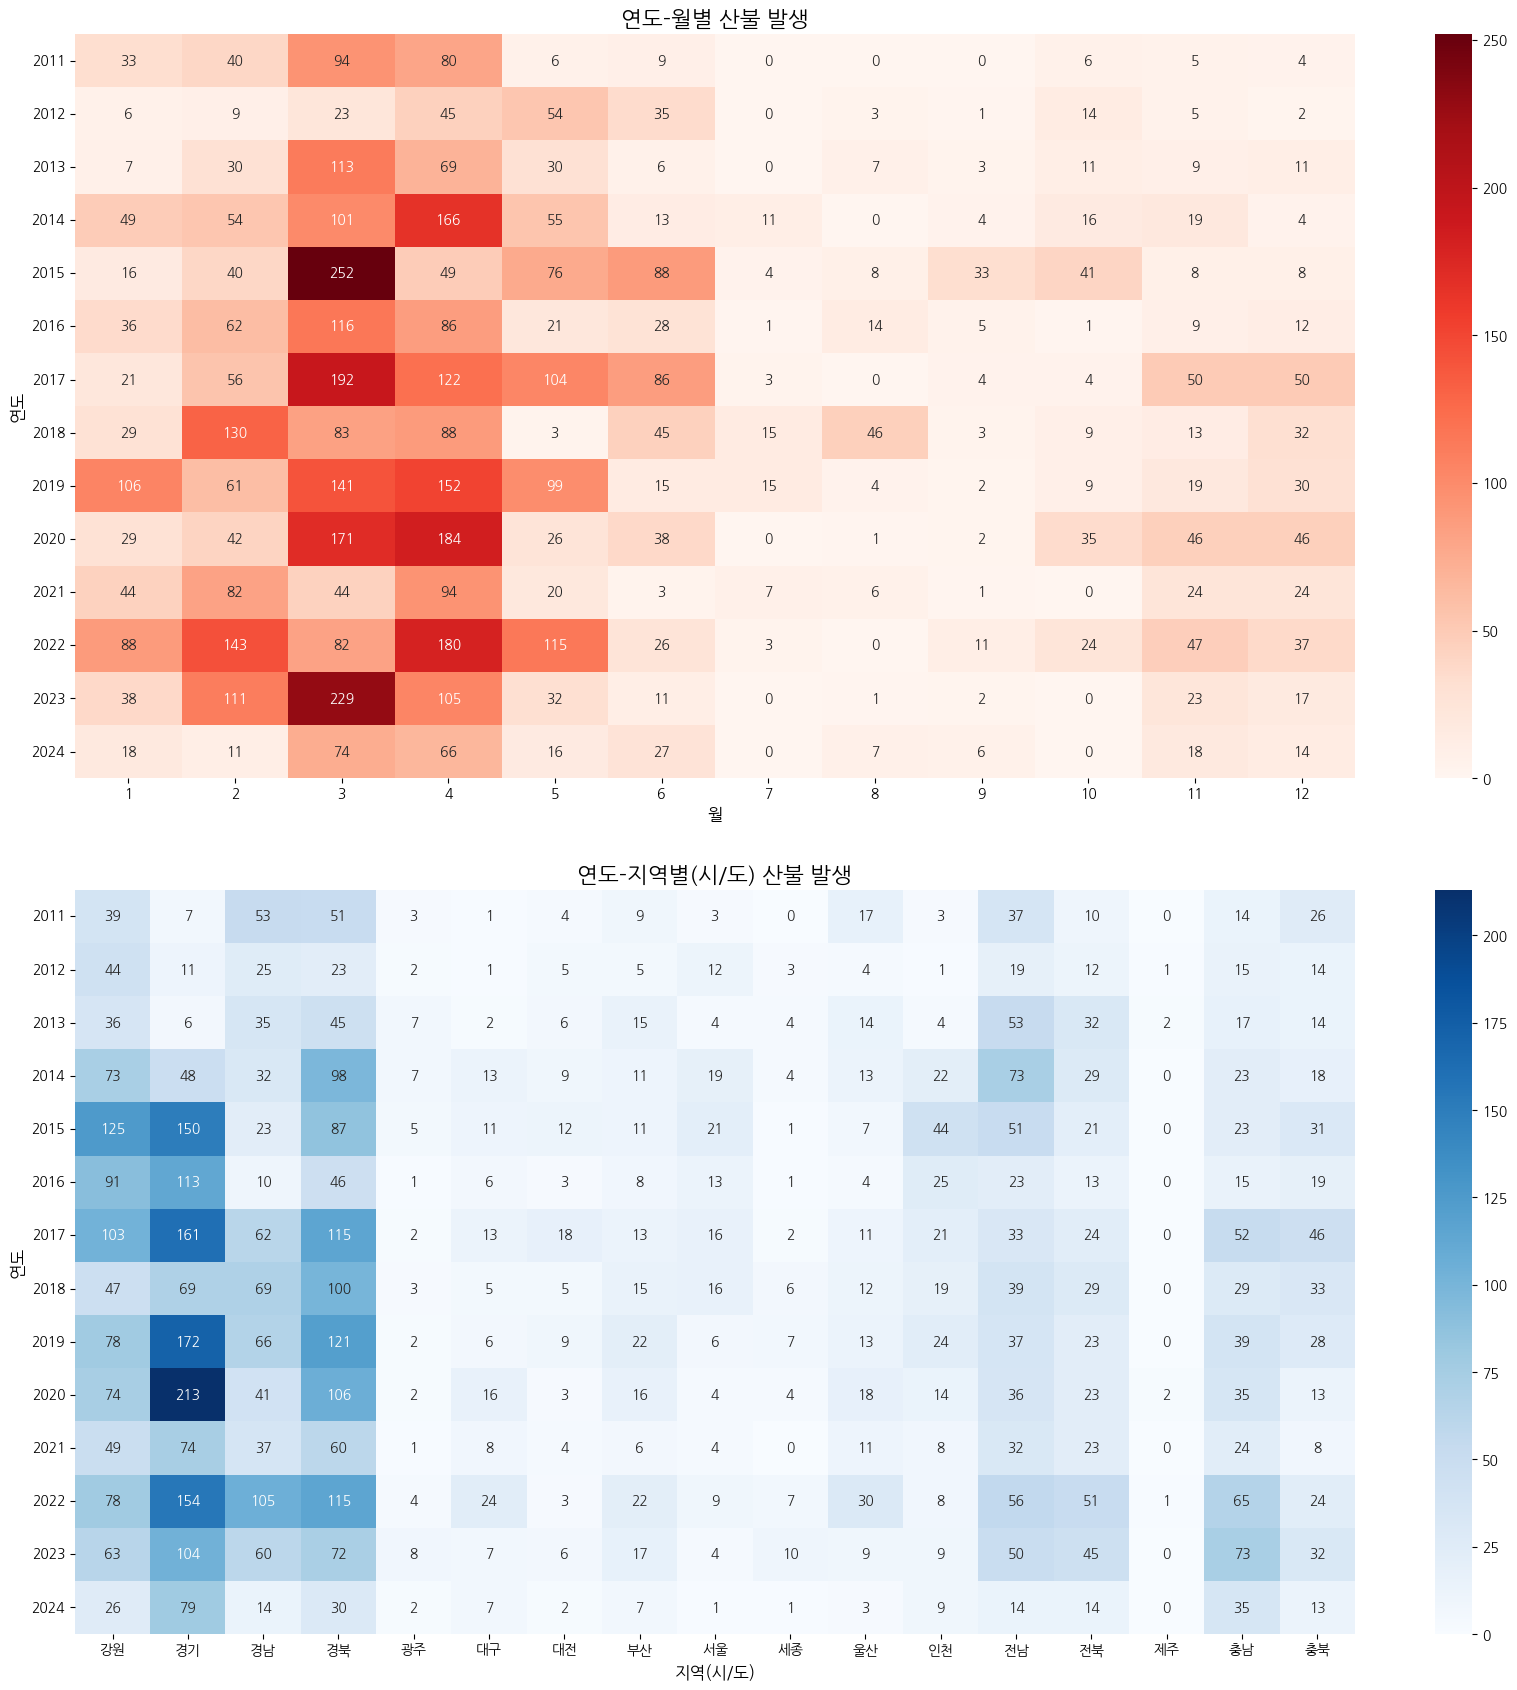

In [ ]:
# 연도 & 월별 데이터 확인
year_month_occur_df = re_fire_df.groupby(['startyear', 'startmonth']).size().reset_index(name='count')
year_month_occur_heatmap = year_month_occur_df.pivot(index='startyear', columns='startmonth', values='count').fillna(0)

# 연도 & 지역별(시/도) 데이터 확인
year_loc_occur_df = re_fire_df.groupby(['startyear', 'locsi']).size().reset_index(name='count')
year_loc_occur_heatmap = year_loc_occur_df.pivot(index='startyear', columns='locsi', values='count').fillna(0)

# 시각화
plt.figure(figsize=(20, 20))

# 히트맵 생성 - 연도 & 월별
plt.subplot(2,1,1)
sns.heatmap(year_month_occur_heatmap, annot=True, fmt=".0f", cmap="Reds")

# 그래프 제목 및 축 레이블 설정
plt.title("연도-월별 산불 발생", fontsize=16)
plt.xlabel("월", fontsize=12)
plt.ylabel("연도", fontsize=12)
plt.yticks(rotation=0)

# 히트맵 생성 - 연도 & 지역별(시/도)
plt.subplot(2,1,2)
sns.heatmap(year_loc_occur_heatmap, annot=True, fmt=".0f", cmap="Blues")

# 그래프 제목 및 축 레이블 설정
plt.title("연도-지역별(시/도) 산불 발생", fontsize=16)
plt.xlabel("지역(시/도)", fontsize=12)
plt.ylabel("연도", fontsize=12)
plt.yticks(rotation=0)

# 차트 간격
plt.subplots_adjust(hspace=0.15, wspace=0.3, top=0.9, bottom=0.1, left=0.1, right=0.9)

# 출력
plt.show()

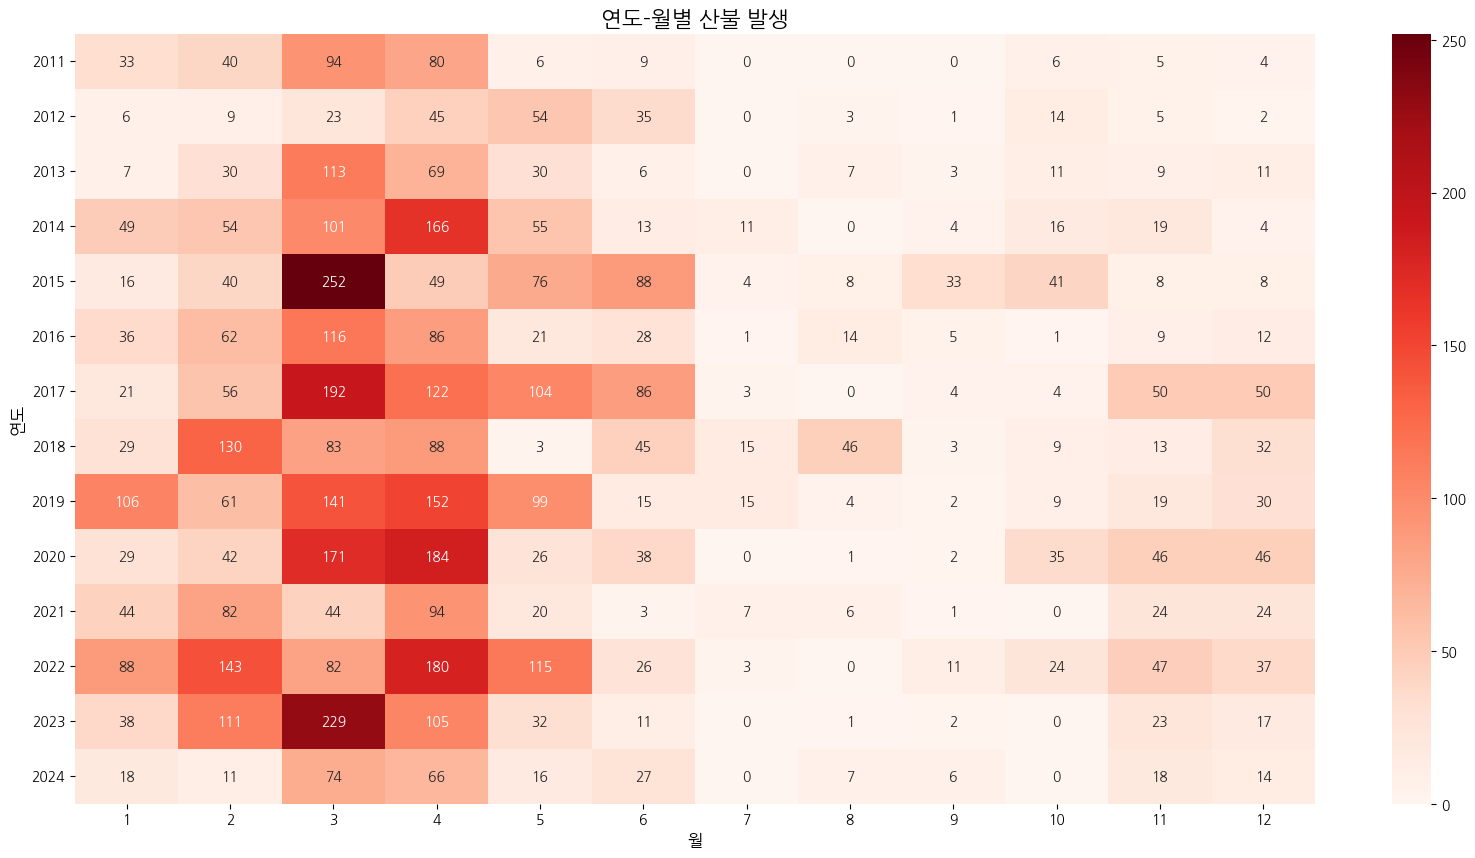

In [21]:
# 연도 & 월별 데이터 확인
year_month_occur_df = re_fire_df.groupby(['startyear', 'startmonth']).size().reset_index(name='count')
year_month_occur_heatmap = year_month_occur_df.pivot(index='startyear', columns='startmonth', values='count').fillna(0)

# 시각화
plt.figure(figsize=(20, 10))

# 히트맵 생성 - 연도 & 월별
sns.heatmap(year_month_occur_heatmap, annot=True, fmt=".0f", cmap="Reds")

# 그래프 제목 및 축 레이블 설정
plt.title("연도-월별 산불 발생", fontsize=16)
plt.xlabel("월", fontsize=12)
plt.ylabel("연도", fontsize=12)
plt.yticks(rotation=0)

plt.savefig('../result/occur1_1.png')
# 출력
plt.show()

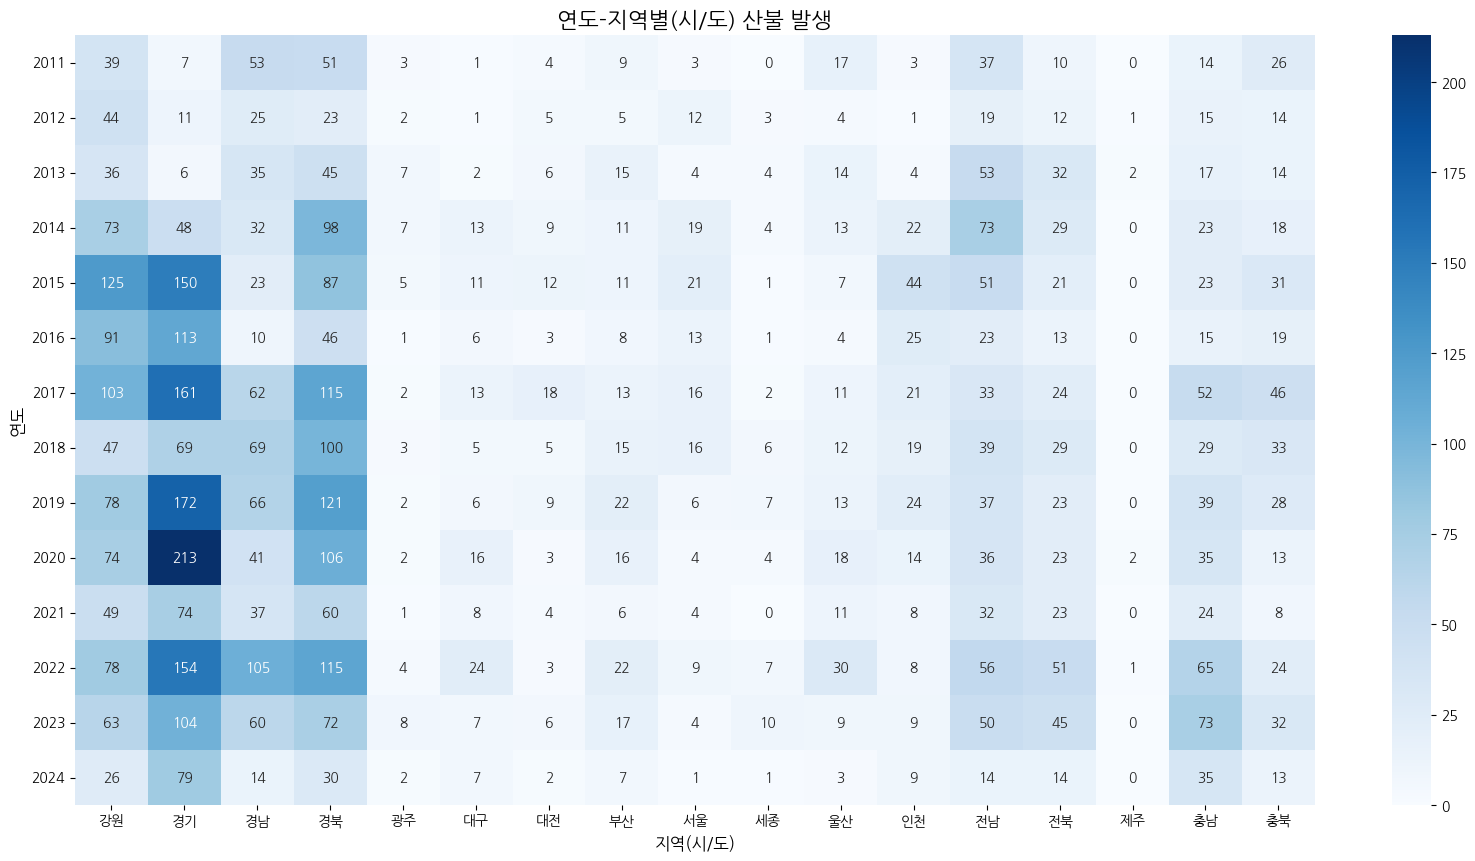

In [20]:
# 연도 & 지역별(시/도) 데이터 확인
year_loc_occur_df = re_fire_df.groupby(['startyear', 'locsi']).size().reset_index(name='count')
year_loc_occur_heatmap = year_loc_occur_df.pivot(index='startyear', columns='locsi', values='count').fillna(0)

# 시각화
plt.figure(figsize=(20, 10))

# 히트맵 생성 - 연도 & 지역별(시/도)
sns.heatmap(year_loc_occur_heatmap, annot=True, fmt=".0f", cmap="Blues")

# 그래프 제목 및 축 레이블 설정
plt.title("연도-지역별(시/도) 산불 발생", fontsize=16)
plt.xlabel("지역(시/도)", fontsize=12)
plt.ylabel("연도", fontsize=12)
plt.yticks(rotation=0)

plt.savefig('../result/occur1_2.png')
# 출력
plt.show()

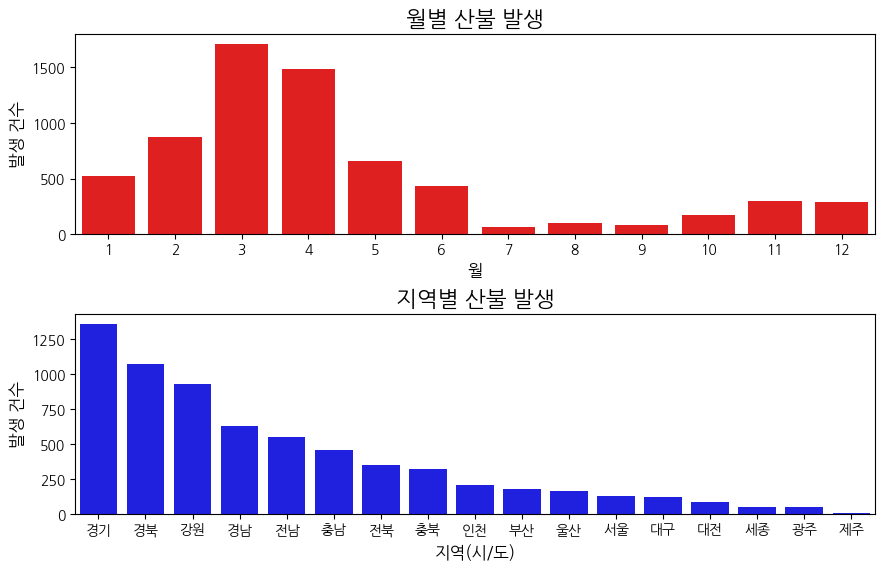

In [6]:
#월별 데이터 확인
moth_occur_df = re_fire_df.groupby(['startmonth']).size().reset_index(name='count')

# 지역별(시/도) 데이터 확인
loc_occur_df = re_fire_df.groupby(['locsi']).size().reset_index(name='count').sort_values('count', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))

# 바차트 생성 - 월별
plt.subplot(2,1,1)
sns.barplot(x='startmonth', y='count', data=moth_occur_df, color='Red')

# 그래프 제목 및 축 레이블 설정
plt.title("월별 산불 발생", fontsize=16)
plt.xlabel("월", fontsize=12)
plt.ylabel("발생 건수", fontsize=12)
plt.yticks(rotation=0)

# 바차트 생성 - 지역별(시/도)
plt.subplot(2,1,2)
sns.barplot(x='locsi', y='count', data=loc_occur_df, color='Blue')

# 그래프 제목 및 축 레이블 설정
plt.title("지역별 산불 발생", fontsize=16)
plt.xlabel("지역(시/도)", fontsize=12)
plt.ylabel("발생 건수", fontsize=12)
plt.yticks(rotation=0)

# 차트 간격 조정
plt.subplots_adjust(hspace=0.4, wspace=0.3, top=0.9, bottom=0.1, left=0.1, right=0.9)

# 출력
plt.show()

### 데이터 정제 - 2차
- 2024년도 데이터 제거
- 인구 데이터 확인 후 추가 작업
    - 2011년 ~ 2014년 06월 데이터 제거
    - 2023년 07월 ~ 2023년 12월 데이터 제거
- 도 단위 데이터만 활용 (광역시, 특별시 등 제외)

In [7]:
# 전국 지역 좌표 데이터 불러오기
target_loc = {
    '경기': '경기도',
    '강원': '강원도',
    '경북': '경상북도',
    '경남': '경상남도',
    '전북': '전라북도',
    '전남': '전라남도',
    '충북': '충청북도',
    '충남': '충청남도'
}

target_dts = [datetime.datetime.strftime(datetime.date(2014,7,1) + datetime.timedelta(days=daydiff), '%Y%m%d') for daydiff in range((datetime.date(2023,6,30) - datetime.date(2014,7,1)).days + 1)]

loc_point_data_path = '../data/korea_administrative_division.csv'
loc_point_df = pd.read_csv(loc_point_data_path, encoding='cp949')

filt_loc_point_df = loc_point_df[
    (loc_point_df['sd_nm'].isin(target_loc.values()))
    & (~loc_point_df['sgg_nm'].isnull())
].reset_index(drop=True)

filt_loc_point_df = filt_loc_point_df[['bjd_nm', 'sd_nm', 'sgg_nm', 'emd_nm', 'li_nm', 'center_long', 'center_lati']]

filt_fire_df = re_fire_df.copy()
filt_fire_df = filt_fire_df[
    (filt_fire_df['occurDate'].isin(target_dts))
    & (filt_fire_df['locsi'].isin(target_loc.keys()))
].reset_index(drop=True)
filt_fire_df

,occurDate,startyear,startmonth,locsi,locgungu,locmenu,locdong
0,20140701,2014,7,전북,정읍,칠보,반곡
1,20140707,2014,7,경기,안산 단원,대부남,-
2,20140712,2014,7,경기,구리,교문,망우1보루
3,20140718,2014,7,경기,가평,설악,가일
4,20140720,2014,7,경기,김포,하성,가금
...,...,...,...,...,...,...,...
4411,20230618,2023,6,경남,함안,군북,사촌
4412,20230618,2023,6,강원,양양,현남,주
4413,20230619,2023,6,충북,보은,내북,화전
4414,20230619,2023,6,강원,춘천,남산,산수


## 1-2. 날씨 데이터

In [8]:
weather_df = pd.read_csv('../data/weather_history.csv', index_col=0)
weather_df = weather_df.rename(
    {
        '지점':'stdId',
        '지점명':'stdName',
        '일시':'date',
        '평균기온(°C)':'tempAvg',
        '최저기온(°C)':'tempMin',
        '최고기온(°C)':'tempMax',
        '강수 계속시간(hr)':'rnHr',
        '일강수량(mm)':'rain',
        '최대 풍속(m/s)':'windMax',
        '평균 풍속(m/s)':'windAvg',
        '풍정합(100m)':'wrDay',
        '최소 상대습도(%)':'humMin',
        '평균 상대습도(%)':'humAvg',
        '평균 증기압(hPa)':'hPaAvg'
    }, axis=1
)

weather_df = weather_df[
    [
        'stdId', 'stdName', 'date', 'tempAvg', 'tempMin',
        'tempMax', 'rain', 'windMax', 'windAvg', 'humMin',
        'humAvg'
    ]
]

weather_df['date'] = weather_df['date'].apply(lambda x: ''.join(x.split('-')))
weather_df = weather_df.sort_values(['date', 'stdId'])
filt_weather_df = weather_df[weather_df['date'].isin(target_dts)].reset_index(drop=True)
filt_weather_df['stdId'] = filt_weather_df['stdId'].astype('str')

pd.concat([filt_weather_df.head(), filt_weather_df.tail()])

,stdId,stdName,date,tempAvg,tempMin,tempMax,rain,windMax,windAvg,humMin,humAvg
0,90,속초,20140701,21.9,18.8,25.4,NaN,3.9,1.5,81.0,97.5
1,95,철원,20140701,23.8,17.6,30.7,NaN,2.9,1.1,42.0,76.0
2,98,동두천,20140701,25.5,18.4,32.2,NaN,4.3,1.5,38.0,64.4
3,99,파주,20140701,24.5,18.4,31.4,NaN,2.9,1.1,38.0,69.6
4,100,대관령,20140701,19.4,13.7,25.2,0.5,4.0,1.7,59.0,NaN
312408,288,밀양,20230630,25.4,23.4,27.7,17.7,2.9,0.9,70.0,82.8
312409,289,산청,20230630,24.0,22.9,26.9,9.0,3.3,1.0,84.0,94.9
312410,294,거제,20230630,23.2,21.4,24.9,23.5,4.3,1.9,82.0,93.3
312411,295,남해,20230630,24.2,22.7,26.1,33.2,3.9,1.6,78.0,91.8
312412,296,북부산,20230630,24.5,23.2,26.7,8.5,5.0,2.6,80.0,91.1


## 1-3. 토지 면적 데이터

In [9]:
land_df = pd.read_csv('../data/land_use_stats_renewal.csv', encoding='cp949')

for col in land_df.columns:
    if '년' in col:
        land_df = land_df.rename({col:col[:4]}, axis=1)

land_df.head()

,시도,시군구,레벨01,항목,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,경기,수원시 장안구,계,면적,33343598.7,33343740.7,33343560.7,33349467.5,33341117.0,33342316.9,33342288.9,33342085.1,33343885.7,33342057.7
1,경기,수원시 장안구,전,면적,1562727.8,1554203.8,1546961.8,1548736.6,1582394.6,1577961.5,1595157.5,1597702.3,1602760.4,1599677.7
2,경기,수원시 장안구,답,면적,1173381.4,1161807.4,1153978.4,1134930.8,1095798.8,1062849.8,1042166.8,1019606.8,1006166.9,988801.4
3,경기,수원시 장안구,묘지,면적,46457.0,46457.0,46188.0,46052.0,46052.0,44155.0,44074.0,44074.0,43806.0,41349.0
4,경기,수원시 권선구,계,면적,47170567.7,47173330.2,47173414.0,47169074.4,47166542.9,47170329.7,47182349.6,47179157.1,47180198.5,47179838.0


## 1-4. 인구 데이터

In [10]:
population_df = pd.read_csv('../data/total_population_renewal.csv', encoding='cp949')

## 1-5. 날짜 데이터

In [11]:
# 날짜 데이터프레임 생성
# 지역 개편으로 인해 토지 면적의 경우 2011~2013년 일부 지역의 데이터가 없으므로 제외
dts = pd.date_range(
    start='7/1/2014',
    end='6/30/2023',
    tz='Asia/Seoul'
)

dt_df = pd.DataFrame(dts, columns=['DateTime'])
dt_df['strDateTime'] = dt_df['DateTime'].apply(lambda x: datetime.datetime.strftime(x, '%Y%m%d'))
dt_df.drop(['DateTime'], axis=1, inplace=True)

pd.concat([dt_df.head(), dt_df.tail()])

,strDateTime
0,20140701
1,20140702
2,20140703
3,20140704
4,20140705
3282,20230626
3283,20230627
3284,20230628
3285,20230629
3286,20230630


# 2. 데이터 결합

In [12]:
def getWeatherInfo(data:pd.Series, ref:pd.DataFrame=filt_weather_df):
    dt = data.date
    longitude = data.center_long
    latitude = data.center_lati
    
    distance_dict = {}
    
    with open(f'../data/location/{dt[:4]}/{dt}.txt', 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines[3:-1]:
            values = line.split()
            spotId = values[0]
            spotLon = values[1]
            spotLat = values[2]
            
            distance = math.sqrt((longitude-float(spotLon))**2 + (latitude-float(spotLat))**2)
            distance_dict[spotId] = [distance]
    
    sortedList = sorted(distance_dict.items(), key=lambda x: x[1])

    weather_info = pd.DataFrame(columns=weather_df.columns)
    
    while weather_info.empty:
        shortestSpot = sortedList.pop(0)[0]
        weather_info = ref[(ref['date']==dt) & (ref['stdId']==shortestSpot)].reset_index(drop=True)

    filt_weather_info = weather_info[['tempAvg', 'tempMin', 'tempMax', 'rain', 'windMax', 'windAvg', 'humMin', 'humAvg']].to_dict(orient='index')
    
    return pd.Series(filt_weather_info[0])

In [13]:
def getLandInfo(data:pd.Series, ref:pd.DataFrame=land_df):
    dt = data.date
    ssgName = data.sgg_nm
    
    total_area_df = ref[(ref['시군구'] == ssgName) & (ref['레벨01'] == '계')][dt[:4]]
    field_area_df = ref[(ref['시군구'] == ssgName) & (ref['레벨01'] == '전')][dt[:4]]
    paddy_area_df = ref[(ref['시군구'] == ssgName) & (ref['레벨01'] == '답')][dt[:4]]
    cemetery_area_df = ref[(ref['시군구'] == ssgName) & (ref['레벨01'] == '묘지')][dt[:4]]
    
    if total_area_df.empty:
        totalArea = None
        fieldArea = None
        paddyArea = None
        cemeteryArea = None
    else:
        totalArea = total_area_df.values[0]
        fieldArea = field_area_df.values[0]
        paddyArea = paddy_area_df.values[0]
        cemeteryArea = cemetery_area_df.values[0]
    
    land_info = {
        'total_area': totalArea,
        'field_area': fieldArea,
        'paddy_area': paddyArea,
        'cemetery_area': cemeteryArea
    }
    
    return pd.Series(land_info)

In [14]:
def getPopulationInfo(data:pd.Series, ref:pd.DataFrame=population_df):
    dt = data.date
    locName = data.bjd_nm
    
    population = ref[ref['ssgName'] == locName][dt[:6]].values[0]
    population_info = {'population': population}
    
    return pd.Series(population_info)

In [ ]:
total_df = pd.DataFrame(columns=['date'] + filt_loc_point_df.columns.to_list() + ['occur'])

for dt in tqdm(dt_df['strDateTime']):
    tmp_df = filt_loc_point_df.copy()
    tmp_df.insert(0, 'date', dt)
    tmp_df['occur'] = 0

    occur_df = filt_fire_df[filt_fire_df['occurDate'] == dt]
    
    for idx in occur_df.index:
        locsi = occur_df['locsi'][idx]
        locgungu = occur_df['locgungu'][idx]
        locgungu_split = locgungu.split()
        locmenu = occur_df['locmenu'][idx]
        locdong = occur_df['locdong'][idx]

        '''
        # 처음 시군구 정보가 없는 경우를 해결하기 위한 조건문
        # if locgungu != '-':
        #     if len(locgungu_split) == 1:
        #         ssgList = tmp_df[
        #             (tmp_df['sd_nm'] == (target_loc[locsi]))
        #             & (tmp_df['sgg_nm'].str[:len(locgungu)] == locgungu)
        #         ]['sgg_nm'].unique()
        #     else:
        #         ssgList = tmp_df[
        #             (tmp_df['sd_nm'] == (target_loc[locsi]))
        #             & (tmp_df['sgg_nm'].str.contains(locgungu_split[0]))
        #             & (tmp_df['sgg_nm'].str.contains(locgungu_split[1]))
        #         ]['sgg_nm'].unique()
        # else:
        #     if locmenu != '-':
        #         ssgList = tmp_df[
        #             (tmp_df['sd_nm'] == (target_loc[locsi]))
        #             & (~tmp_df['emd_nm'].isnull())
        #             & (tmp_df['emd_nm'].str[:len(locmenu)] == locmenu)
        #         ]['sgg_nm'].unique()
        #     else:
        #         ssgList = tmp_df[
        #             (tmp_df['sd_nm'] == (target_loc[locsi]))
        #             & (~tmp_df['emd_nm'].isnull())
        #             & (~tmp_df['li_nm'].isnull())
        #             & (tmp_df['li_nm'].str[:len(locdong)] == locdong)
        #         ]['sgg_nm'].unique()
        '''
        if len(locgungu_split) == 1:
            ssgList = tmp_df[
                (tmp_df['sd_nm'] == (target_loc[locsi]))
                & (tmp_df['sgg_nm'].str[:len(locgungu)] == locgungu)
            ]['sgg_nm'].unique()
        else:
            ssgList = tmp_df[
                (tmp_df['sd_nm'] == (target_loc[locsi]))
                & (tmp_df['sgg_nm'].str.contains(locgungu_split[0]))
                & (tmp_df['sgg_nm'].str.contains(locgungu_split[1]))
            ]['sgg_nm'].unique()
        
        tmp_df.loc[(tmp_df['sd_nm'] == (target_loc[locsi])) & (tmp_df['sgg_nm'] == (ssgList[0])), 'occur'] = 1

    filt_tmp_df = tmp_df[tmp_df['emd_nm'].isnull()].reset_index(drop=True)
    
    filt_tmp_df[['tempAvg', 'tempMin', 'tempMax', 'rain', 'windMax', 'windAvg', 'humMin', 'humAvg']] = filt_tmp_df.apply(lambda x:getWeatherInfo(x), axis=1)
    filt_tmp_df[['total_area', 'field_area', 'paddy_area', 'cemetery_area']] = filt_tmp_df.apply(lambda x: getLandInfo(x), axis=1)
    filt_tmp_df['population'] = filt_tmp_df.apply(lambda x: getPopulationInfo(x), axis=1)
    filt_tmp_df = filt_tmp_df.drop(['bjd_nm', 'emd_nm', 'li_nm', 'center_long', 'center_lati'], axis=1)
    
    if total_df.empty:
        total_df = filt_tmp_df.copy()
    else:
        total_df = pd.concat([total_df, filt_tmp_df]).reset_index(drop=True)
    
    save_df = total_df.copy()
    save_df.insert(len(save_df.columns)-1, 'occur', save_df.pop('occur'))
    save_df.to_csv('../data/rawDataDT2.csv', index=False, encoding='cp949')

In [16]:
# pre_save_df = pd.read_csv('../data/rawDataDT.csv', encoding='cp949')
# final_df = pd.concat([pre_save_df, save_df])
# final_df.info()
# final_df.to_csv('../data/rawData_utf.csv', index=False, encoding='utf-8')